# Лабораторная работа №1
# Решение обыкновенных дифференциальных уравнений

## 1. Методы решения ОДУ

Существует большое количество методов численного решения задачи. Для решения ОДУ в данной лабораторной работе будут использованы: явный и неявный метод Эйлера, усовершенствованный метод Эйлера, методы Гира различных порядков.

При построении численных алгоритмов будем считать, что решение этой дифференциальной задачи существует, оно единственно и обладает необходимыми свойствами гладкости.

Идея численных методов решения задачи состоит из четырех частей:
1. Вводится расчетная сетка по переменной t (время) из $N_{t}+1$ точки $t_{0}, t_{1}, ..., t_{N_{t}}$. Нужно найти значения неизвестной функции u в узлах сетки $t_{n}$. Обозначим через $y^{n}$ приближенное значение u($t_{n}$).

2. Предполагаем, что дифференциальное уравнение выполнено в узлах сетки.

3. Аппроксимируем производные конечными разностями.

4. Формулируем алгоритм, который вычисляет новые значения $y^{n+1}$ на основе предыдущих вычисленных значений $y^{k}$, $k < n$

### Явный метод Эйлера

Проиллюстрируем указанные шаги. Для начала введем расчетную сетку. Очень часто сетка является равномерной, т.е. имеет одинаковое расстояние между узлами $t_{n}$ и $t_{n+1}$:
$$\omega_{\tau} = \left \{ t_{n} = n\tau, n = 0,1,...,N_{t} \right \}.$$

Затем, предполагаем, что уравнение выполнено в узлах сетки, т.е.: 
$$u'(t_{n} = F(t_{n}, u(t_{n}))$$

Заменяем производные конечными разностями. Запишем определение производной в произвольном узле сетки $t_{n}$: 
$$u'(t_{n}) = \lim_{\tau \rightarrow 0} \frac{u(t_{n}+\tau)-u(t_{n})}{\tau}$$

Вместо того, чтобы устремлять шаг сетки к нулю, мы можем использовать малый шаг $\tau$, который даст численное приближение $u'(t_{n})$: 
$$u'(t_{n}) \approx \frac{u^{n+1}-u^{n}}{\tau}$$

Такая аппроксимация известна как разностная производная вперед и имеет первый порядок по $\tau$, то есть $O(\tau)$. Теперь можно использовать аппроксимацию производной. Таким образом получим явный метод Эйлера: 
$$\frac{y^{n+1}-y^{n}}{\tau} = F(t_{n}, y^{n})$$

Выразим $y^{n+1}$: $$y^{n+1} = y^{n} + \tau F(t_{n}, y^{n})$$

При условии, что $y^{0} = u_{0}$, можно находить решения на последующих временных слоях.

### Неявный метод Эйлера

При построении неявного метода Эйлера значение функции ${F}$ берется на новом временном слое, т.е. 
$$\frac{y^{n+1}-y^{n}}{\tau} = F(t_{n+1}, y^{n+1})$$

Таким образом для нахождения приближенного значения искомой функции на новом временном слое $t_{n+1}$ нужно решить нелинейное уравнение относительно $y^{n+1}$: $$y^{n+1} - \tau F(t_{n+1}, y^{n+1}) - y^{n} = 0$$

Для решения уравнения можно использовать метод прогонки или метод Ньютона.

### Усовершенствованный метод Эйлера 2-го порядка

Основная идея этого метода: вычисляемое очередное значение $y^{n+1} = y^{n} + \tau F(t_{n}, y^{n})$ будет точнее, если значение производной, то есть угловой коэффициент прямой замещающей интегральную кривую на отрезке $[t_{n}, t_{n + 1}]$ будет вычисляться не по левому краю (то есь в точке $t_{n}$), а по центру отрезка $[t_{n}, t_{n + 1}]$. 

Но так как значение производной между точками $t_{n}$ и $t_{n + 1}$ не вычисляется, то перейдем к сдвоенным участкам $[t_{n - 1}, t_{n + 1}]$ центром в которых является точка $t_{n}$, при этом уравнение прямой получает вид: 
$$y = y^{n - 1} + f(t_{n}, y^{n})(t - t_{n - 1})$$
А формула $y^{n+1} = y^{n} + \tau F(t_{n}, y^{n})$: $$y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$$

Данная формула применима только для $n \geqslant 1$, следовательно, значени $y^{1}$ по ней получить нельзя, поэтому $y^{n}$ находят по методу Эйлера, при этом для получения более точного результата поступают так: сразу по формуле явного метода Эйлера находят значение: 
$$y^{\frac{1}{2}} = y^{0} + \frac{\tau}{2}F(t_{0}, y^{0})$$

В точке $t_{\frac{1}{2}} = t_{0} + \frac{\tau}{2}$, а затем находится $y^{1}$ по формуле $y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$ с шагом $\frac{\tau}{2}$: $$y^{1} = y^{0} + \tau F(t_{\frac{1}{2}}, y^{\frac{1}{2}})$$

После того как $y^{1}$ найдено дальнейшие вычисления при $n = 1,2,3,...N$ производится по формуле $$y^{n+1} = y^{n - 1} + 2\tau F(t_{n}, y^{n})$$

Пример: $y^{2} = y^{0} + 2\tau F(t_{1}, y^{1})$


### Методы Гира 

Метод Гира 1-го порядка: $y^{n} - y^{n - 1} = \tau F(t_{n}, y^{n})$

Метод Гира 2-го порядка: $3y^{n} - 4y^{n - 1} + y^{n - 2} = 2\tau F(t_{n}, y^{n})$

Метод Гира 3-го порядка: $11y^{n} - 18y^{n - 1} + 9y^{n - 2} - 2y^{n - 3} = 6\tau F(t_{n}, y^{n})$

Метод Гира 4-го порядка: $25y^{n} - 48y^{n - 1} + 36y^{n - 2} - 16y^{n - 3} + y^{n - 4} = 12\tau F(t_{n}, y^{n})$

Для нахождения неизвестных значений $y^{0}, y^{1}, y^{2}, y^{3}$ использовался метод Рунге-Кутта 4-го порядка.

## 2. Аналитическое решение и число жесткости

Необходимо решить дифференциальное уравнение

$$\left\{\begin{matrix}
\frac{\mathrm{d} y}{\mathrm{d} t} = 998y + 1998z\\ 
\frac{\mathrm{d} z}{\mathrm{d} t} = -999y - 1999z
\end{matrix}\right.$$

с начальными условиями $y(0)=1, z(0)=1$

Решение: 

$$\left\{\begin{matrix}
\frac{\mathrm{d} y}{\mathrm{d} t} = 998y + 1998z\\ 
\frac{\mathrm{d} z}{\mathrm{d} t} = -999y - 1999z
\end{matrix}\right. \Rightarrow$$

$$\left\{\begin{matrix}
y(t) = 4e^{-t} - 3e^{-1000t} \\ 
z(t) = -2e^{-t} + 3e^{-1000t}
\end{matrix}\right. (t >> 1) \Rightarrow $$

$$\left\{\begin{matrix}
y(t) = 4e^{-t} \\ 
z(t) = -2e^{-t}
\end{matrix}\right.$$

#### Число жесткости: 

$$A = \bigl(\begin{smallmatrix}
998 & 1998 \\ 
-999 & -1999
\end{smallmatrix}\bigr) \Rightarrow$$

$$\lambda_{1} = -1, \lambda_{2} = - 1000 \Rightarrow$$

Число жесткости равно $$\frac{\left | \lambda_{2} \right |}{\left | \lambda_{1} \right |} = 1000$$

## 3. Реализация методов решения ОДУ

Для решения ДУ были использованы такие методы, как явный и неявный методы Эйлера, усовершенственный метод Эйлера, методы Гира 1-го, 2-го и 4-го порядка.

#### Реализация данных методов:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from typing import Callable
import math

In [2]:
def du(t: list, u: list) -> list:
    return [998 * u[0] + 1998 * u[1], -999 * u[0] - 1999 * u[1]]


def analytical_du(t: list, i: int) -> list:
    return [4 * math.exp(-t[i]) - 3 * math.exp(- 1000 * t[i]), 
            - 2 * math.exp(-t[i]) + 3 * math.exp(- 1000 * t[i])]


def runge_kutta(du_: Callable, order: int, tau: float, u: list, t: list) -> list:
    for i in range(order - 1):
        k1 = du_(t[i], u[i])
        k2 = du_(t[i] + tau / 2, u[i] + tau * k1  / 2)
        k3 = du_(t[i] + tau / 2, u[i] + tau * k2  / 2)
        k4 = du_(t[i] + tau, u[i] + tau * k3)
        u[i + 1] = u[i] + tau * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return u


def analytical_solution(tau: float, T_size: float, u0=[1, 1]) -> list and list:
    amount_t = int(round(T_size / tau))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    for i in range(amount_t + 1):
        u[i] = analytical_du(t, i)
    return u, t
    

def explicity_euler(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    for i in range(amount_t):
        du_ = np.asarray(du(t[i], u[i]))
        u[i + 1] = u[i] + tau * du_
    return u, t


def implicity_euler(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    du_ = lambda t, u: np.asarray(du(t, u))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    
    def func(a, t, b):
        return a - tau * du_(t, a) - b
    
    for i in range(amount_t):
        u[i + 1] = optimize.fsolve(func, u[i], (t[i + 1], u[i]))
    return u, t


def improved_euler(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    du_ = lambda t, u: np.asarray(du(t, u))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    
    for i in range(0, amount_t):
        t_ = t[i] + tau / 2
        u_ = u[i] + tau / 2 * du_(t[i], u[i])
        u[i + 1] = u[i] + tau * du_(t_, u_)
    return u, t


def gear_first(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    u, t = implicity_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    return u, t


def gear_second(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    du_ = lambda t, u: np.asarray(du(t, u))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    
    u = runge_kutta(du_=du_, order=2, tau=tau, u=u, t=t)
    
    def func(a, t, b, c):
        return 3 * a - 4 * b + c - 2 * tau * du_(t, a)
    
    for i in range(amount_t - 1):
        u[i + 2] = optimize.fsolve(func, u[i], (t[i + 2], u[i + 1], u[i]))
    return u, t


def gear_fourth(du: Callable, u0: list, tau: float, T_size: float) -> list and list:
    amount_t = int(round(T_size / tau))
    du_ = lambda t, u: np.asarray(du(t, u))
    t = np.linspace(0, amount_t * tau, amount_t + 1)
    u = np.zeros((amount_t + 1, len(u0)))
    u[0] = u0
    
    u = runge_kutta(du_=du_, order=4, tau=tau, u=u, t=t)
    
    def func(a, t, b, c, d, e):
        return 25 * a - 48 * b + 36 * c - 16 * d + e - 12 * tau * du_(t, a)
    
    for i in range(amount_t - 3):
        u[i + 4] = optimize.fsolve(func, u[i], (t[i + 4], u[i + 3], u[i + 2], u[i + 1], u[i]))
    return u, t


T_size = 0.1

#### Функции отрисовки:

In [3]:
def draw(t: list, u: list):
    fig = plt.figure()
    plt.title('ODE solution')
    plt.ylabel('y(t), z(t)')
    plt.xlabel('t')
    l1 = plt.plot(t, u)
    fig.legend((l1), ('yz'))
    plt.grid(True)
    plt.show()


def draw_analytical_solution():
    u, t = analytical_solution(tau=tau, T_size=T_size, u0=[1, 1])
    draw(t, u)
    
    
def draw_explicity_euler():
    u, t = explicity_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    
    
def draw_implicity_euler():
    u, t = implicity_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    
    
def draw_improved_euler():
    u, t = improved_euler(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    

def draw_gear_first():
    u, t = gear_first(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    

def draw_gear_second():
    u, t = gear_second(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)
    

def draw_gear_fourth():
    u, t = gear_fourth(du, u0=[1, 1], tau=tau, T_size=T_size)
    draw(t, u)

## 4. Итоговые результаты

### Аналитическое решение

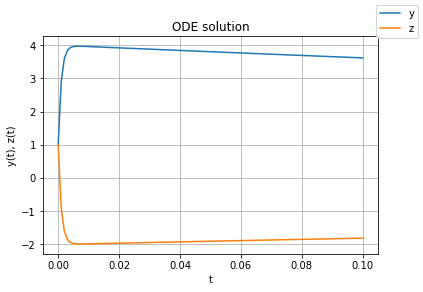

In [4]:
tau = 0.001
draw_analytical_solution()

### Явный метод Эйлера 
Шаг $\tau=0.001$:

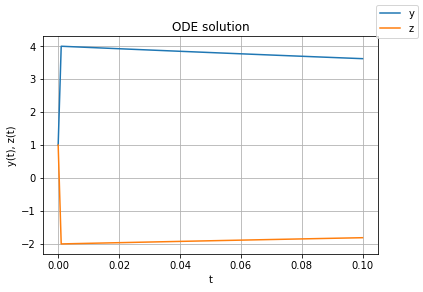

In [5]:
tau = 0.001
draw_explicity_euler()

Шаг $\tau=0.002$:

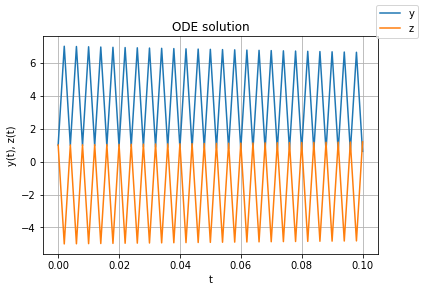

In [6]:
tau = 0.002
draw_explicity_euler()

Шаг $\tau=0.0025$:

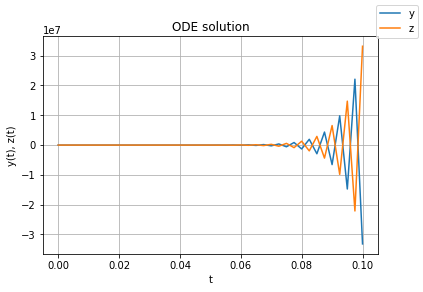

In [7]:
tau = 0.0025
draw_explicity_euler()

### Неявный метод Эйлера 
Шаг $\tau=0.01$:

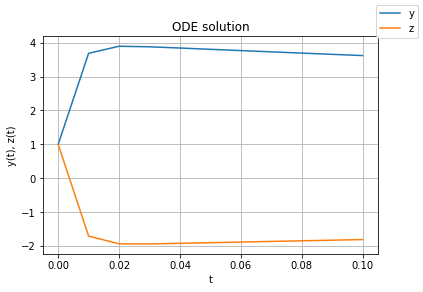

In [8]:
tau = 0.01
draw_implicity_euler()

Шаг $\tau=0.02$:

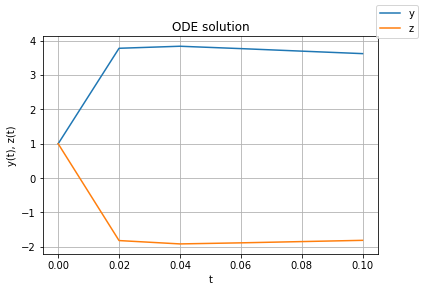

In [9]:
tau = 0.02
draw_implicity_euler()

Шаг $\tau=0.025$:

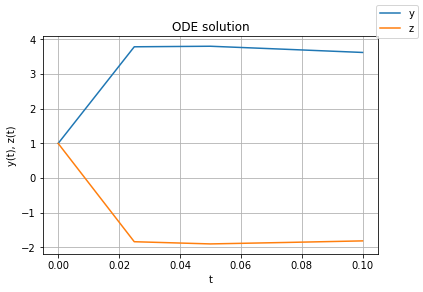

In [10]:
tau = 0.025
draw_implicity_euler()

### Усовершенствованный метод Эйлера 
Шаг $\tau=0.001$:

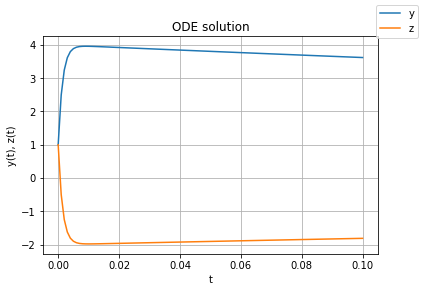

In [11]:
tau = 0.001
draw_improved_euler()

Шаг $\tau=0.002$:

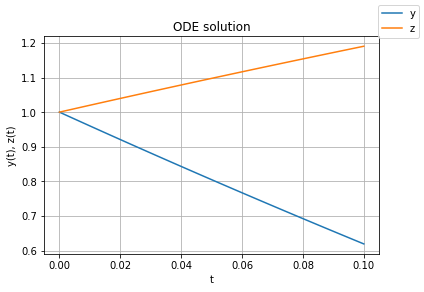

In [12]:
tau = 0.002
draw_improved_euler()

Шаг $\tau=0.0025$:

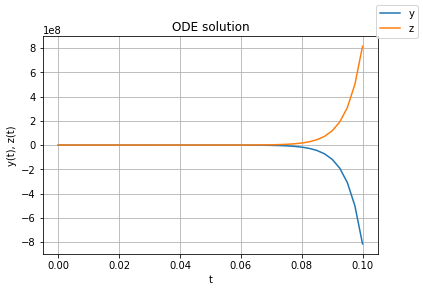

In [13]:
tau = 0.0025
draw_improved_euler()

### Метод Гира 1-го порядка
Шаг $\tau = 0.01$

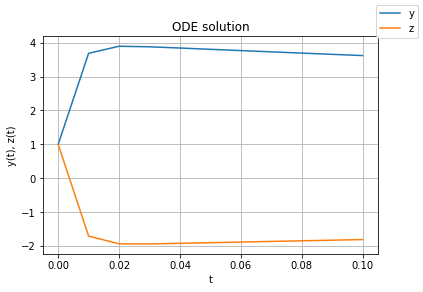

In [14]:
tau = 0.01
draw_gear_first()

Шаг $\tau = 0.02$

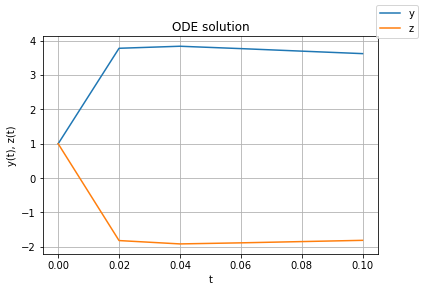

In [15]:
tau = 0.02
draw_gear_first()

### Метод Гира 2-го порядка
Шаг $\tau = 0.01$

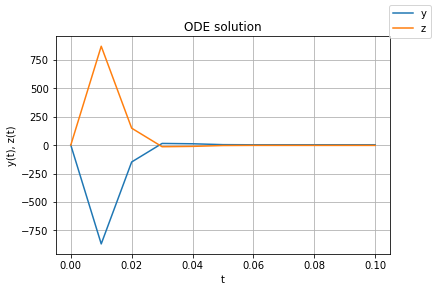

In [16]:
tau = 0.01
draw_gear_second()

Шаг $\tau = 0.02$

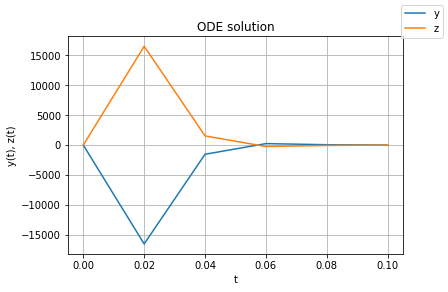

In [17]:
tau = 0.02
draw_gear_second()

### Метод Гира 4-го порядка
Шаг $\tau = 0.01$

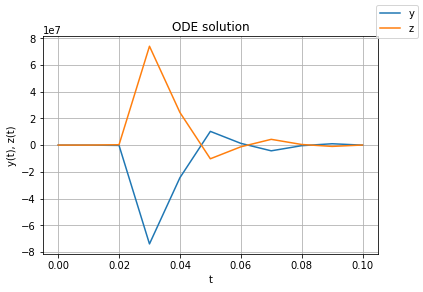

In [18]:
tau = 0.01
draw_gear_fourth()